# Quadratic Cost Gradient for Single-Point Regression

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
xs = torch.linspace(0, 7, steps=8)
xs

tensor([0., 1., 2., 3., 4., 5., 6., 7.])

In [3]:
ys = -0.5*xs + 2 + torch.normal(mean=torch.zeros(8), std=0.2)
ys

tensor([ 2.0198,  1.5082,  1.0873,  0.2246,  0.3467, -0.8646, -1.0065, -1.4981])

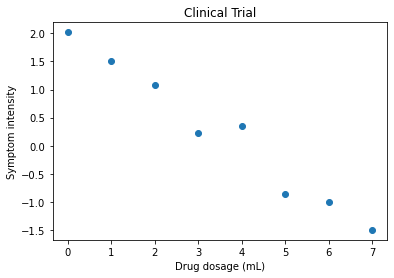

In [4]:
fig, ax = plt.subplots()
plt.title("Clinical Trial")
plt.xlabel("Drug dosage (mL)")
plt.ylabel("Symptom intensity")
ax.scatter(xs, ys)
plt.show()

The slope of a line is given by $y = mx + b$:

In [5]:
def regression(my_x, my_m, my_b):
  return my_m*my_x + my_b

Initialize $m$ and $b$ with the same "random" near-zero values

In [6]:
m = torch.tensor([0.9]).requires_grad_()
m

tensor([0.9000], requires_grad=True)

In [7]:
b = torch.tensor([0.1]).requires_grad_()
b

tensor([0.1000], requires_grad=True)

To keep the partial derivatives as simple as possible, move forward with a single instance $i$ from the eight possible data points (here the 8th data point).



In [8]:
i = 7
x = xs[i]
y = ys[i]

In [9]:
x

tensor(7.)

In [10]:
y

tensor(-1.4981)

### Step 1: Forward pass

We can flow the scalar tensor $x$ through our regression model to produce $\hat{y}$, an estimate of $y$. Prior to any model training, this is an arbitrary estimate:

In [11]:
yhat = regression(x, m, b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

### Step 2: Compare $\hat{y}$ with true $y$ to calculate cost $C$

Mean-squared error averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by:$$ C = (\hat{y} - y)^2 $$


We square the error to keep cost positive and to "punish" larger errors via exponentially increasing cost.

In [12]:
def squared_error(my_yhat, my_y):
    return (my_yhat - my_y)**2

In [13]:
C = squared_error(yhat, y)
C

tensor([62.3799], grad_fn=<PowBackward0>)

### Step 3: Use autodiff to calculate gradient of $C$ wrt. parameters $m$ and $b$

In [14]:
C.backward()

In [15]:
m.grad

tensor([110.5733])

In [16]:
b.grad

tensor([15.7962])

Derivative of $C$ wrt. $m$: $ \frac{\partial C}{\partial m} = 2x(\hat{y} - y) $

In [17]:
2*x*(yhat.item()-y)

tensor(110.5733)

Derivative of $C$ wrt. $b$: $ \frac{\partial C}{\partial b} = 2(\hat{y} - y) $

In [18]:
2*(yhat.item()-y)

tensor(15.7962)

## Gradient of Cost

The gradient of cost, which is symbolized $\nabla C$ (pronounced "nabla C"), is a vector of all the partial derivatives of $C$ with respect to each of the individual model parameters:

$\nabla C = \nabla_p C = \left[ \frac{\partial{C}}{\partial{p_1}}, \frac{\partial{C}}{\partial{p_2}}, \cdots, \frac{\partial{C}}{\partial{p_n}} \right]^T $

In this case, there are only two parameters, $b$ and $m$:

$\nabla C = \left[ \frac{\partial{C}}{\partial{b}}, \frac{\partial{C}}{\partial{m}} \right]^T $

In [19]:
gradient_cost = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient_cost

tensor([[ 15.7962],
        [110.5733]])